<h3> Importing packages and raw data </h3>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

df = pd.read_csv(r"C:\Users\ngchi\Desktop\Data Scientist\Maybank Data Scientist\DS_assessment.csv")

<h3> Exploratory Data Analysis </h3>

In [2]:
df.head()

,ID,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking,Personal Loan
0,1,25,1,49.0,91107,4.0,1.6,Undergrad,0,1,0,NO,NO
1,2,45,19,34.0,90089,3.0,1.5,Undergrad,0,1,0,NO,NO
2,3,39,15,11.0,94720,1.0,1.0,Undergrad,0,0,0,NO,NO
3,4,35,9,NaN,94112,1.0,2.7,Graduate,0,0,0,NO,NO
4,5,35,8,45.0,91330,4.0,1.0,Graduate,0,0,0,NO,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              4980 non-null   float64
 4   Postal Code         5000 non-null   int64  
 5   Family Size         4991 non-null   float64
 6   CCAvgSpending       5000 non-null   float64
 7   Education           5000 non-null   object 
 8   Mortgage            5000 non-null   int64  
 9   Investment Account  5000 non-null   int64  
 10  Deposit Account     5000 non-null   int64  
 11  InternetBanking     5000 non-null   object 
 12  Personal Loan       5000 non-null   object 
dtypes: float64(3), int64(7), object(3)
memory usage: 507.9+ KB


In [4]:
df.describe()

,ID,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Mortgage,Investment Account,Deposit Account
count,5000.000000,5000.000000,5000.000000,4980.000000,5000.000000,4991.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,45.338400,20.104600,73.840361,93152.503000,2.396714,1.937938,56.498800,0.104400,0.06040
std,1443.520003,11.463166,11.467954,46.079300,2121.852197,1.148189,1.747659,101.713802,0.305809,0.23825
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000,0.000000,0.00000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000,0.000000,0.00000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000,0.000000,0.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000,1.000000,1.00000


In [5]:
df.isnull().sum()

ID                     0
Age                    0
Experience             0
Income                20
Postal Code            0
Family Size            9
CCAvgSpending          0
Education              0
Mortgage               0
Investment Account     0
Deposit Account        0
InternetBanking        0
Personal Loan          0
dtype: int64

<Axes: xlabel='Personal Loan', ylabel='count'>

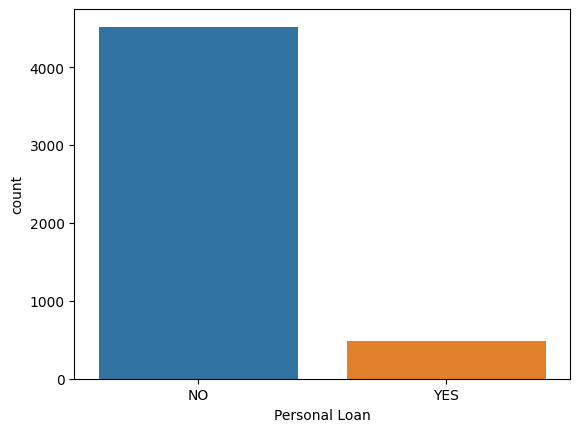

In [8]:
sns.countplot(x='Personal Loan', data = df)

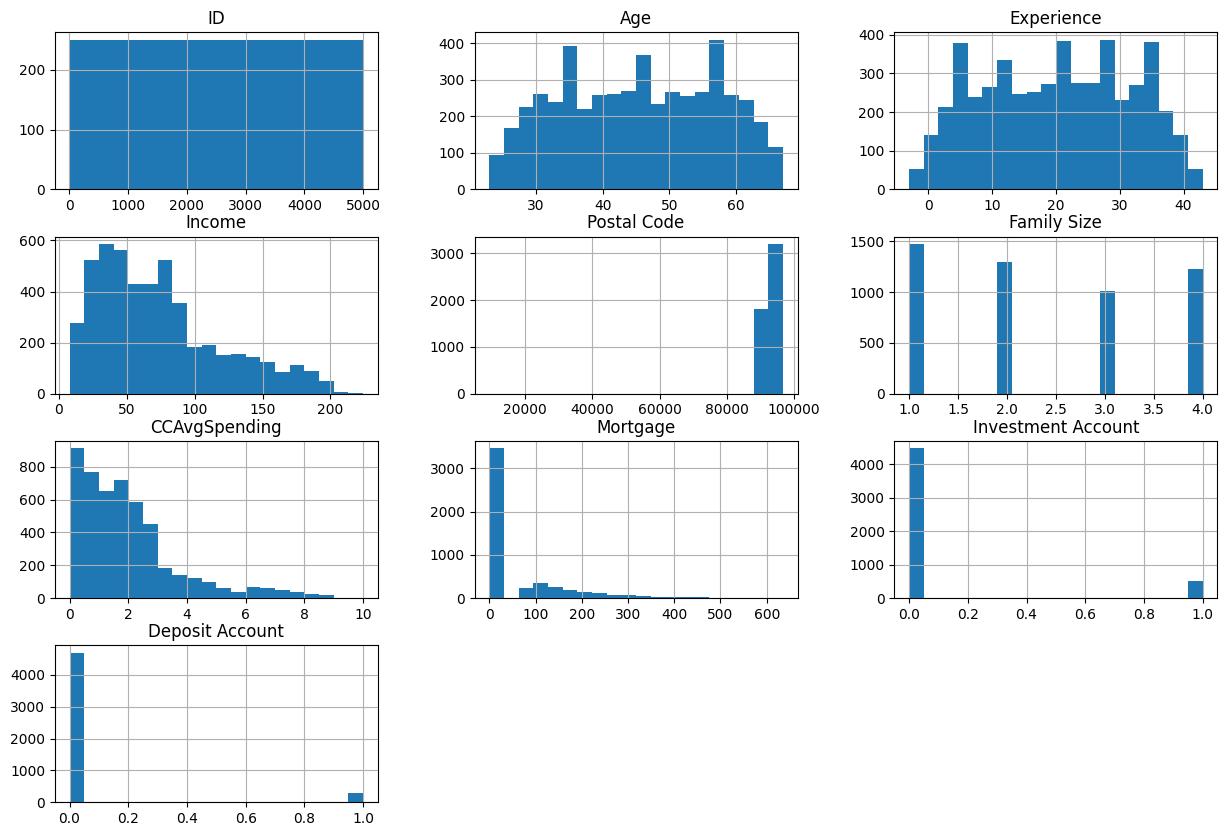

In [9]:
df.hist(bins = 20, figsize = (15,10))
plt.show()

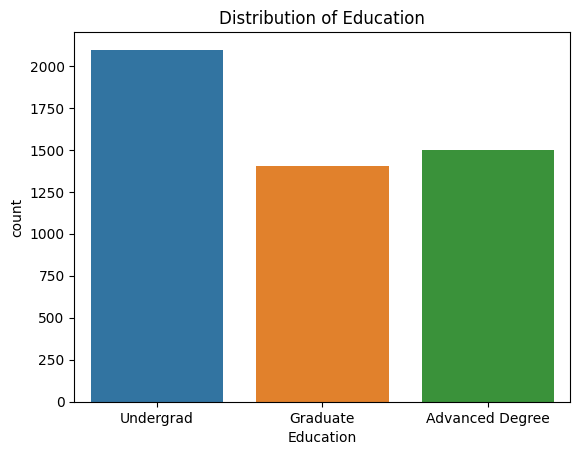

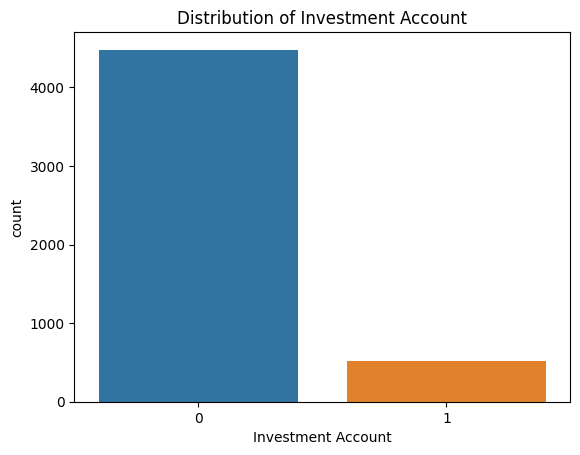

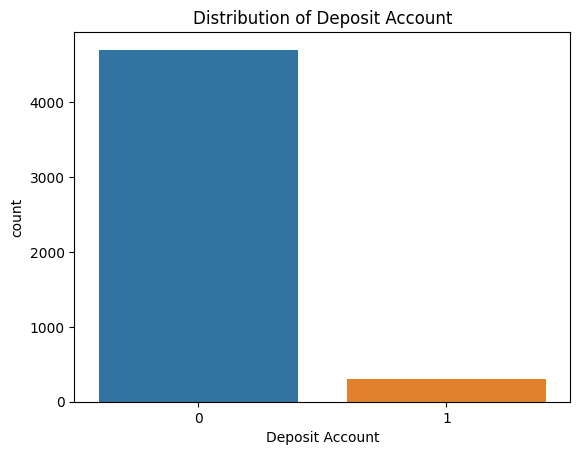

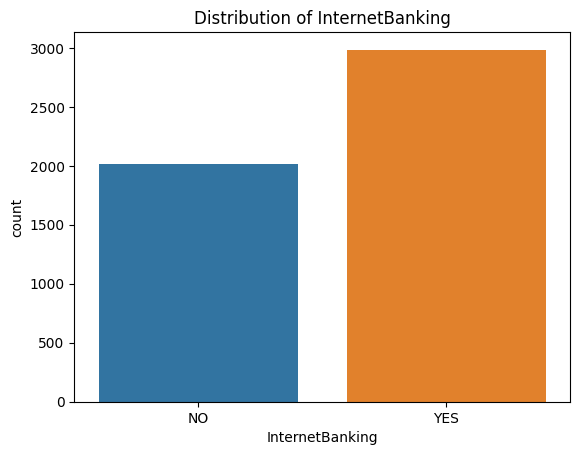

In [10]:
for feature in ['Education', 'Investment Account', 'Deposit Account', 'InternetBanking']:
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()


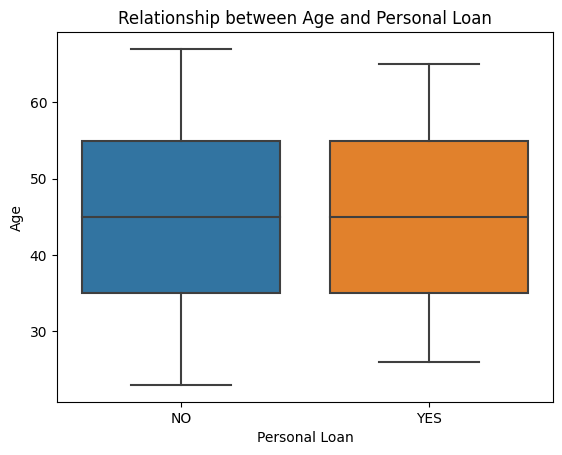

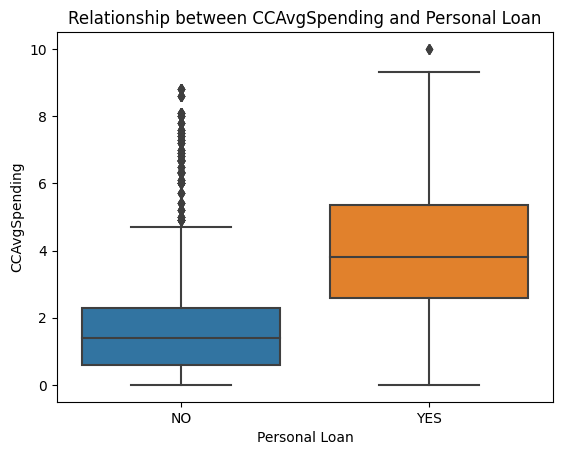

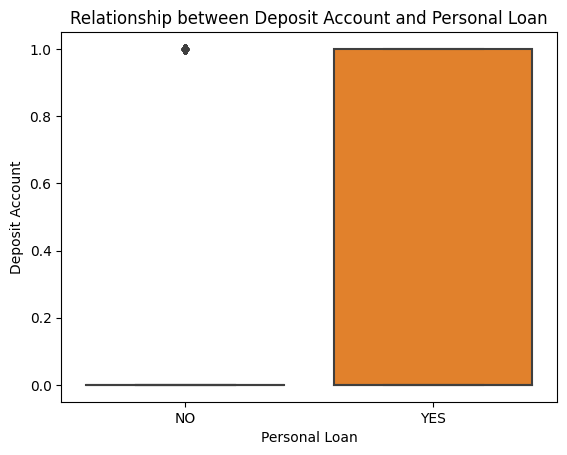

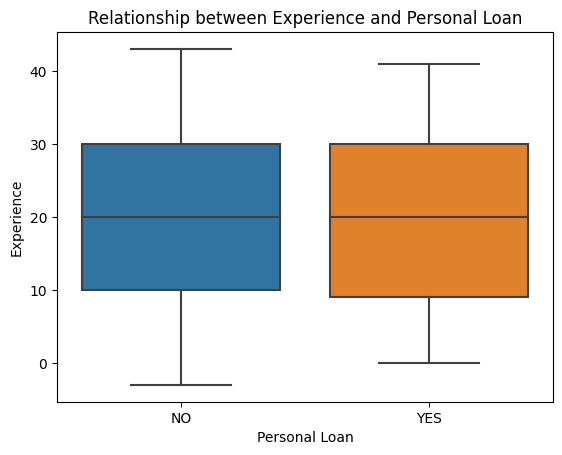

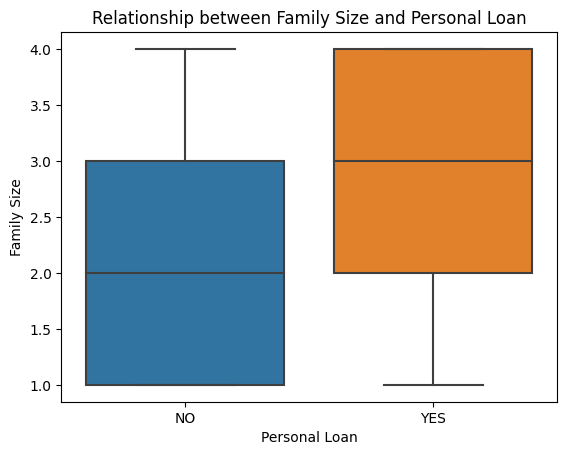

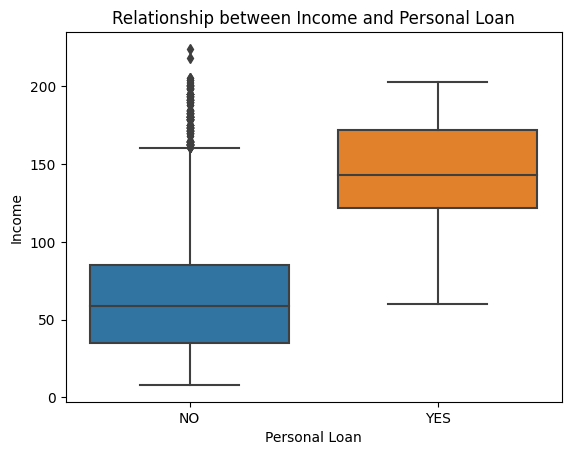

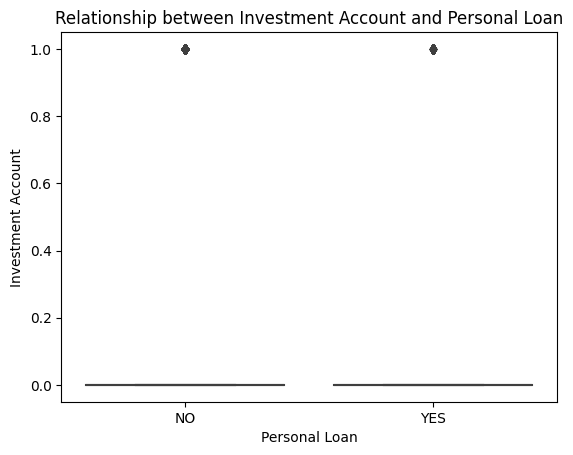

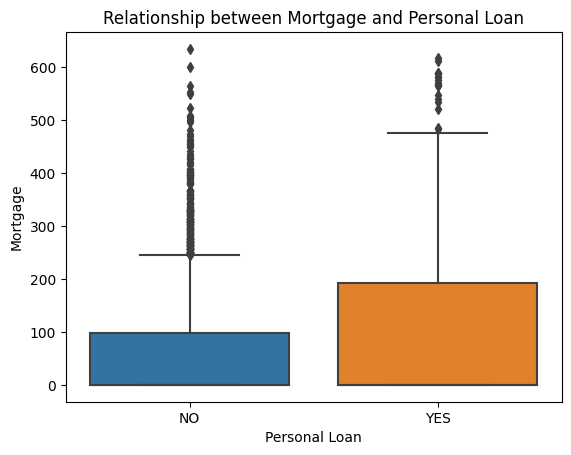

In [13]:
for feature in df.columns.difference(['ID', 'Personal Loan', 'Postal Code']):
    if df[feature].dtype != 'object':
        sns.boxplot(x='Personal Loan', y=feature, data=df)
        plt.title(f'Relationship between {feature} and Personal Loan')
        plt.show()


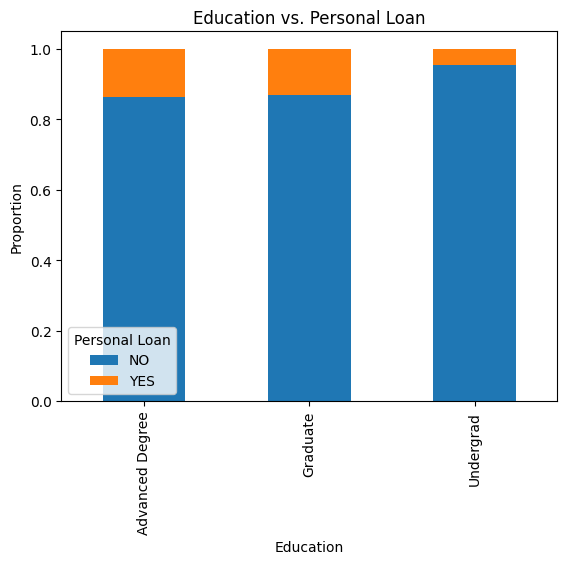

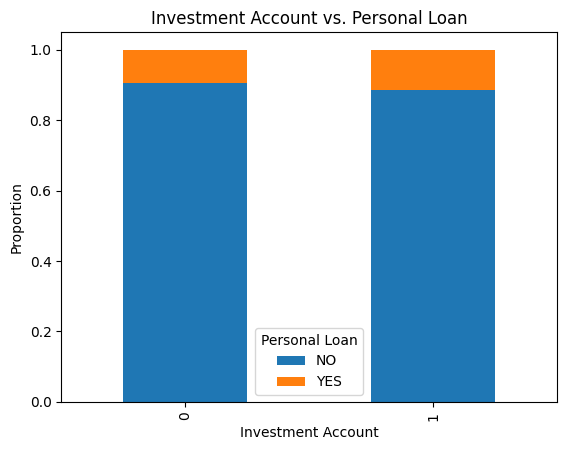

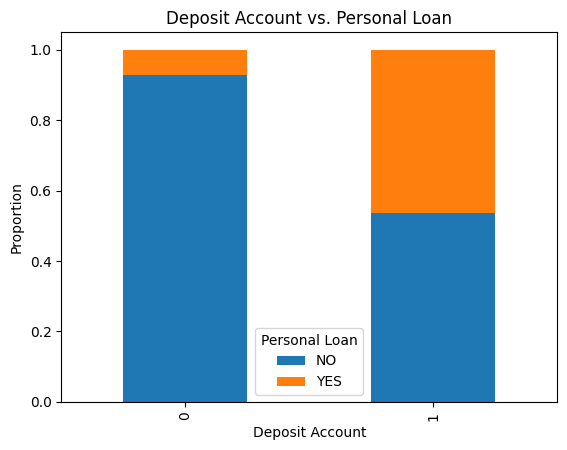

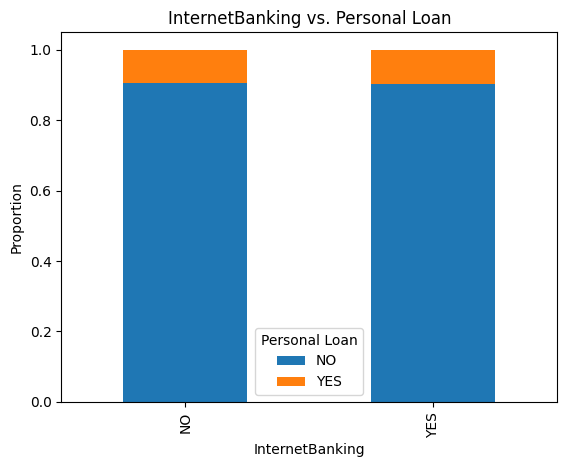

In [14]:
for feature in ['Education', 'Investment Account', 'Deposit Account', 'InternetBanking']:
    ct = pd.crosstab(df[feature], df['Personal Loan'], normalize='index')
    ct.plot(kind='bar', stacked=True)
    plt.title(f'{feature} vs. Personal Loan')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.show()


In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);